In [1]:
import requests
import os
import numpy as np

In [2]:
# Load data from advent of code
url = "https://adventofcode.com/2022/day/8/input"
headers = {"Cookie": os.environ["AOC_COOKIE_01"]}
r = requests.get(url, headers=headers)

In [3]:
# Parse the grid
trees = np.array([list(c) for c in r.text.split("\n")][:-1], dtype=int)

In [4]:
# Initialise matrix of visible trees and scores
visible = np.zeros(trees.shape) 
scores = np.zeros(trees.shape) 

for (x, y), h in np.ndenumerate(trees):
    
    # Up down left right
    views = [
        trees[:x, y][::-1],
        [] if x == trees.shape[0] - 1 else trees[x+1:, y],
        trees[x, :y][::-1],
        [] if y == trees.shape[0] - 1 else trees[x, y+1:]
    ]

    # if the tree is larger than the biggest tree in any direction, it is visible
    if h > min(max(v, default=-1) for v in views):
        visible[x, y] = 1

    # Multiply the distance of the nearest tree in each direction that is at least the same size as the current tree
    scores[x, y] = np.prod([min([i for i, t in enumerate(v, 1) if t >= h], default=len(v)) for v in views])

In [5]:
# Part 1: Sum the visible trees
visible.sum()

1713.0

In [6]:
# Part 2: Max scenic score
scores.max()

268464.0

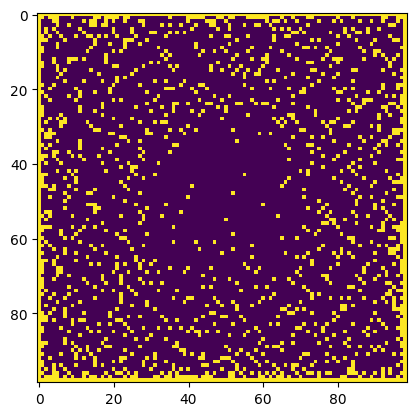

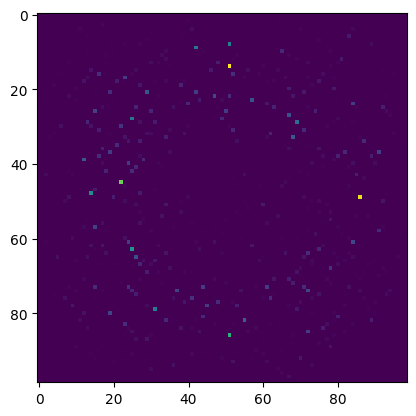

In [7]:
# Bonus... can also visualise using matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline

plt.imshow(visible)
plt.show()
plt.imshow(scores)
plt.show()